## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("winequality-red.csv")
pd.set_option('display.max_columns', 100)
print(data)

Saving winequality-red.csv to winequality-red.csv
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47         

In [3]:
print(data.shape)

(1599, 12)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
duplicate_rows_df = data[data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (240, 12)


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


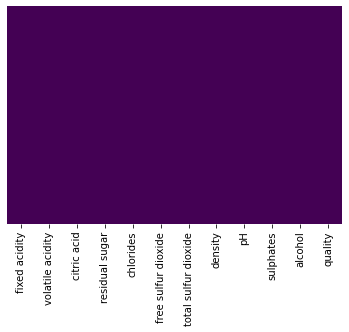

In [7]:
sn.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(data)
cols = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.0  
1  0.21538

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


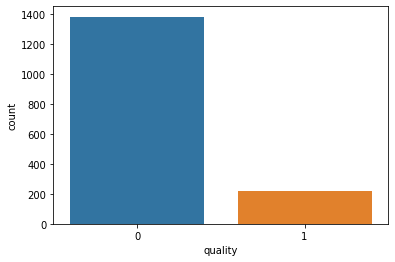

In [9]:
sn.countplot(data['quality'])

In [10]:
X = normalizedData.iloc[:,0:11]
y = normalizedData.iloc[:,11]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)


In [11]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.8645833333333334


In [67]:
model_bagging = BaggingClassifier(random_state = 42, n_estimators = 10, base_estimator = DecisionTreeClassifier(max_depth =4) )
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.8979166666666667


In [71]:
base_est = DecisionTreeClassifier(max_depth=4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost.fit(X_train, y_train)
print("Accuracy=",accuracy_score(y_test, ada_boost.predict(X_test)))

Accuracy= 0.9270833333333334


In [72]:
feature_importances = ada_boost.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df2 = (df.sort_values("importance", ascending = False))
print(df2.iloc[:3])

           features  importance
1  volatile acidity    0.134077
4         chlorides    0.120873
8                pH    0.117720


In [14]:
model_rf = RandomForestClassifier(n_estimators=400, max_features=9, random_state=0, max_depth=11)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)
acc = accuracy_score(y_test, predict_rf)
print(' Accuracy = ', acc)


 Accuracy =  0.93125


In [15]:
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, predict_rf)))

Confusion Matrix:
[[407   8]
 [ 25  40]]


In [74]:
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df2 = (df.sort_values("importance", ascending = False))
print(df2.iloc[:3])

            features  importance
10           alcohol    0.220999
9          sulphates    0.114437
1   volatile acidity    0.106272


In [75]:
rfClf = RandomForestClassifier(n_estimators=400, max_features = 9,random_state=0, max_depth=11) 
svmClf = SVC(probability=True, random_state=0) 
logClf = LogisticRegression(random_state=0)
dtClf = DecisionTreeClassifier(max_depth = 4)
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf), ('dt', dtClf)], voting='soft') 
clf2.fit(X_train, y_train)

clf2_pred = clf2.predict(X_test)
recall_voting = recall_score(y_test, clf2_pred)
precision_voting = precision_score(y_test, clf2_pred)
print('Accuracy score', accuracy_score(y_test, clf2_pred))

Accuracy score 0.89375


In [76]:
rfClf.fit(X_train, y_train)
rfClf_pred = rfClf.predict(X_test)
print('Accuracy score', accuracy_score(y_test, rfClf_pred))

svmClf.fit(X_train, y_train)
svmClf_pred = svmClf.predict(X_test)
print('Accuracy score', accuracy_score(y_test, svmClf_pred))

logClf.fit(X_train, y_train)
logClf_pred = logClf.predict(X_test)
print('Accuracy score', accuracy_score(y_test, logClf_pred))

dtClf.fit(X_train, y_train)
dtClf_pred = dtClf.predict(X_test)
print('Accuracy score', accuracy_score(y_test, dtClf_pred))

Accuracy score 0.93125
Accuracy score 0.8916666666666667
Accuracy score 0.88125
Accuracy score 0.8854166666666666


In [77]:
#KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier(n_estimators=400, max_features=9, random_state=0, max_depth=10)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.908 (0.016)


In [78]:
#RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RandomForestClassifier(n_estimators=400, max_features=9, random_state=0, max_depth=10)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.908 (0.020)


In [25]:
#XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [28]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.290474


In [30]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)

pred_train = linear_reg_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train,pred_train))
print("Train RMSE: %f" % (train_rmse))

pred_test = linear_reg_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test,pred_test))
print("Test RMSE: %f" % (test_rmse))

Train RMSE: 0.298431
Test RMSE: 0.299295


In [31]:
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, metrics="rmse",as_pandas=True, seed=123)

In [32]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.470619,0.000428,0.471330,0.000924
1,0.446628,0.001893,0.447902,0.002347
2,0.425999,0.001868,0.427784,0.003721
3,0.407664,0.002150,0.410201,0.004017
4,0.392225,0.002401,0.395578,0.005624


In [33]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.291607
Name: test-rmse-mean, dtype: float64


In [34]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

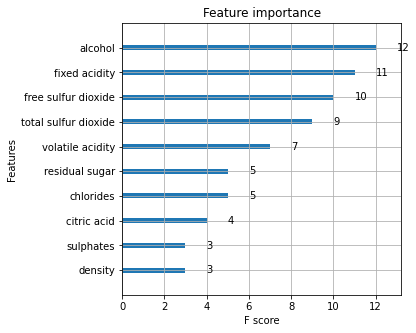

In [37]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [18]:
param_grid = {
    'n_estimators': [100, 400],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(model_rf, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
grid.fit(X_train, y_train)

best_estimator = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   57.9s finished


In [19]:
best_pred_y = best_estimator.predict(X_test)
print("Accuracy: {}%".format(accuracy_score(y_test, best_pred_y)*100))


Accuracy: 92.29166666666667%


In [20]:
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, best_pred_y)))

Confusion Matrix:
[[409   6]
 [ 31  34]]


Medium post: 
https://taylorye-42664.medium.com/red-wine-quality-classification-c0483ba2e015
